# Explore here

VAMOS A IMPORTAR TODAS LAS LIBRERIAS NECESARIAS    

In [11]:
# # Librerías básicas
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y división de datos
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Optimización
from sklearn.model_selection import GridSearchCV

# Guardar el modelo
import joblib


In [12]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Vamos a visualizar que valores no tienen sentido clinico

In [15]:
# Valores 0 que no tienen sentido clínico
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_with_zeros] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

3. Reemplazamos 0 por NaN

In [16]:
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

4. Vamos a rellenar con la mediana para no tener datos NaN


In [17]:
# Imputación con la mediana (opcionalmente se puede usar KNN o media)
df.fillna(df.median(), inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


5. Analisis de variables

Variables numéricas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


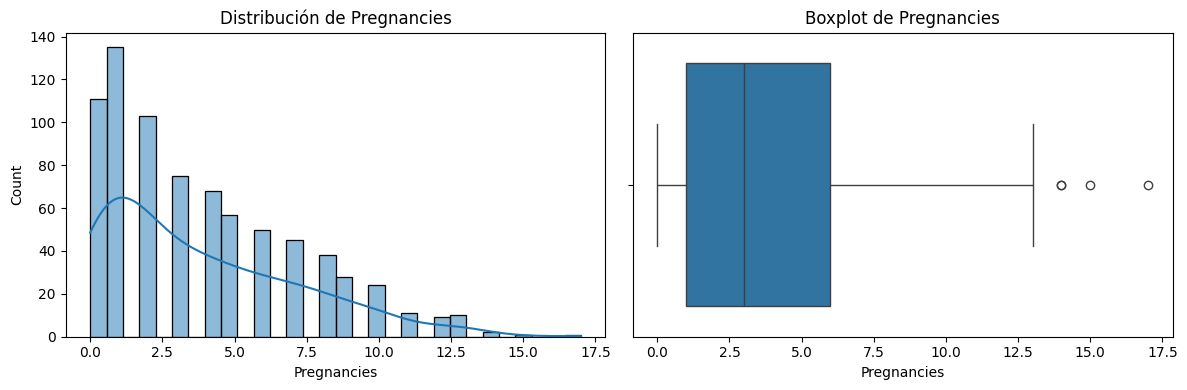

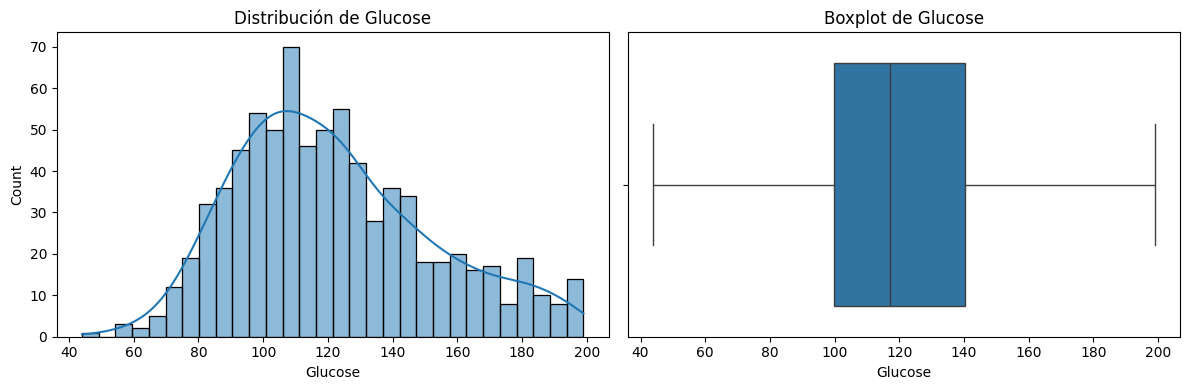

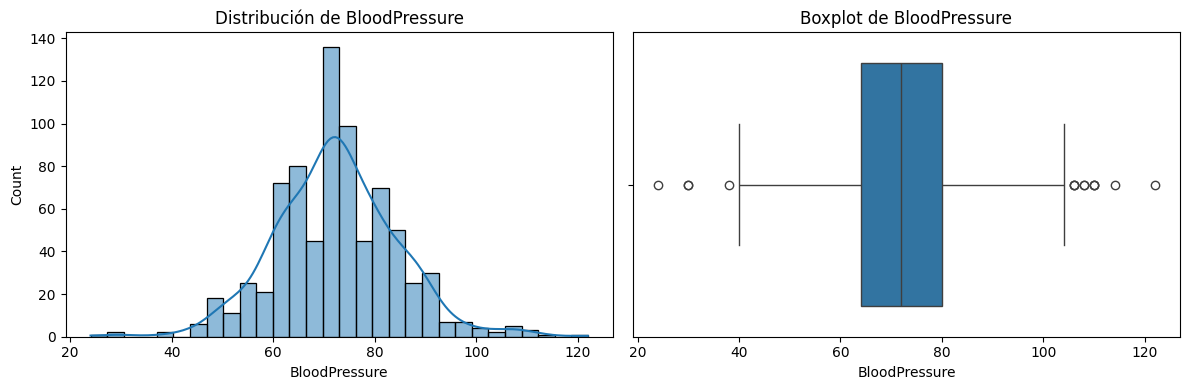

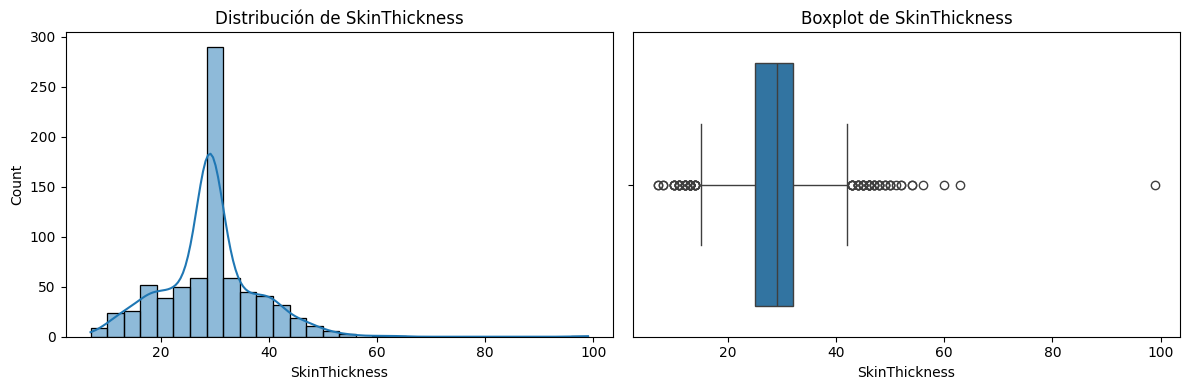

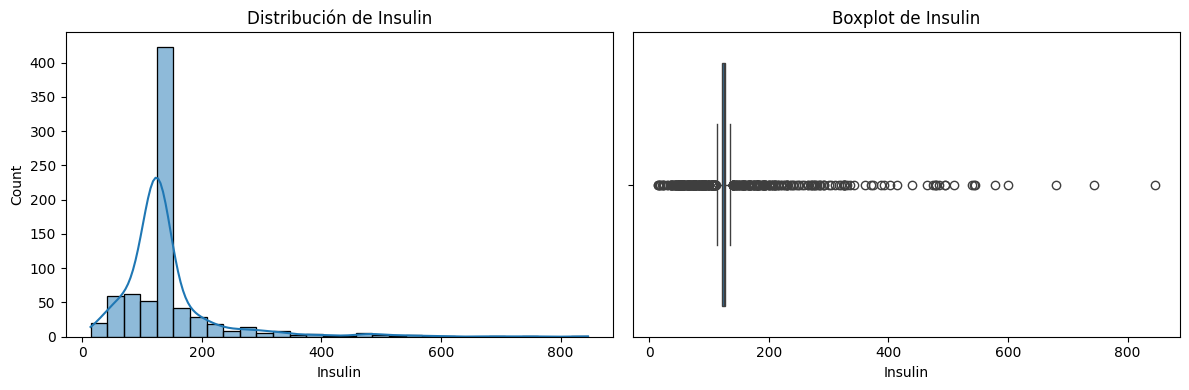

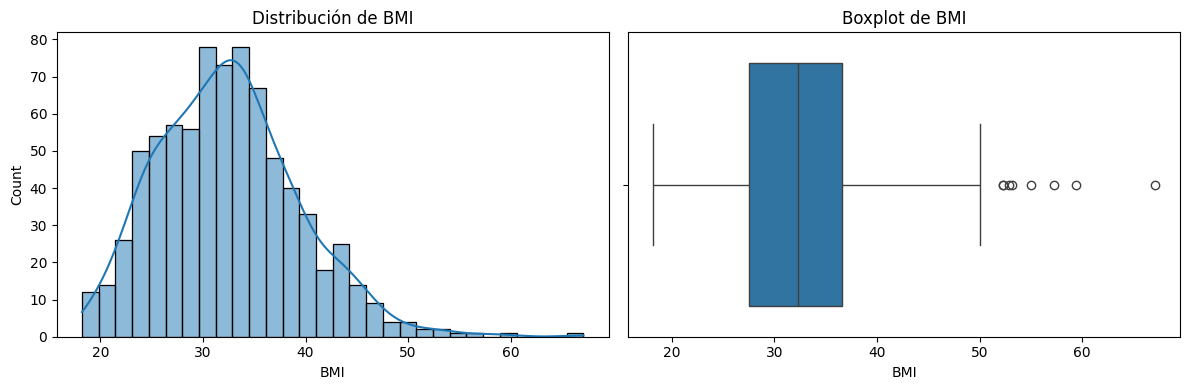

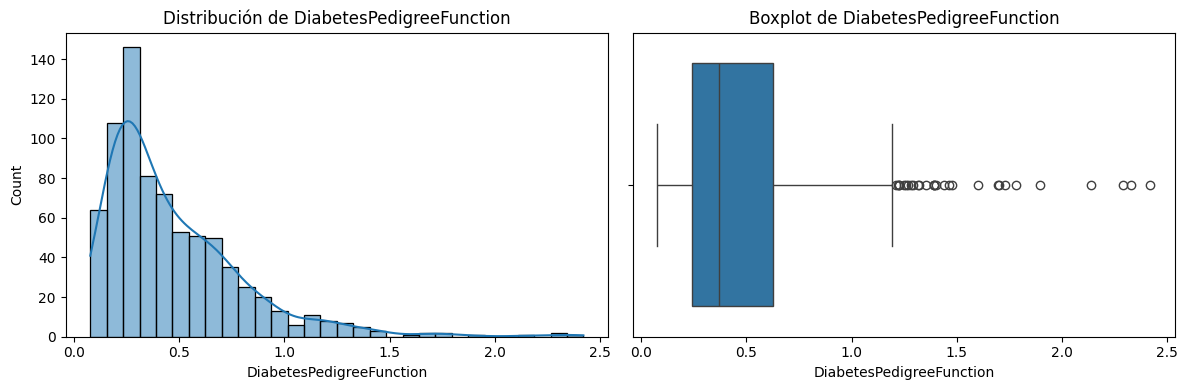

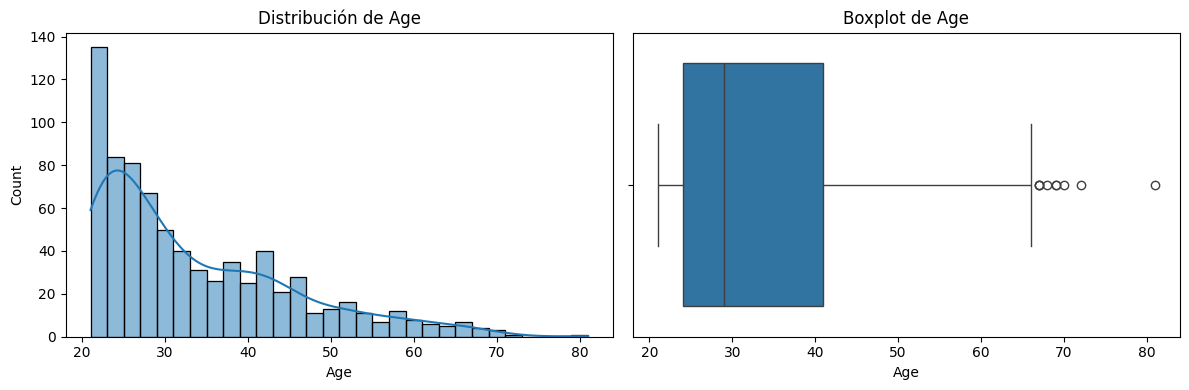

In [18]:
# Clasificamos variables
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables numéricas:", numericas)

# Outcome será tratada como categórica
categoricas = ['Outcome']
numericas.remove('Outcome')



# Histograma y boxplot por variable
for col in numericas:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col], bins=30, kde=True, ax=axs[0])
    axs[0].set_title(f'Distribución de {col}')
    
    sns.boxplot(x=df[col], ax=axs[1])
    axs[1].set_title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()


Conclusion analisis de variables: 


Podemos ver que practimente en todas las variables hay outliers, estos outliers en casos como Pregnancy, Glucose, Age, BMI y DiabetesPedigree no son extremos y podrian ser clinicamente validos.

Donde si vamos a tratar de solucionar es en BloodPressure con winsorizing.

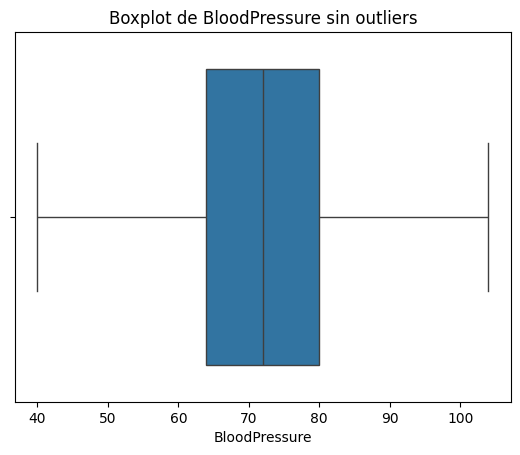

In [19]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtramos el DataFrame
df = df[(df['BloodPressure'] >= lower_limit) & (df['BloodPressure'] <= upper_limit)]

sns.boxplot(x=df['BloodPressure'])
plt.title("Boxplot de BloodPressure sin outliers")
plt.show()


Ahora vamos a realizar un analisis multivariable para observar correlaciones entre variables

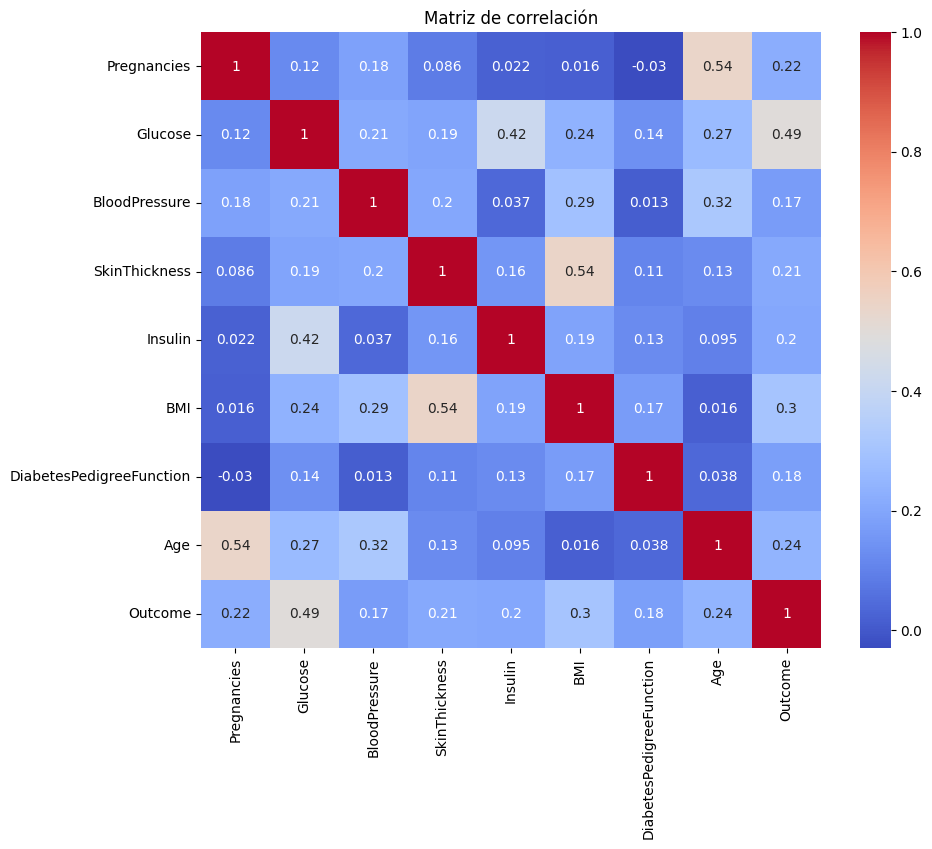

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


Podemos observar que la glucosa tiene la correlacion mas alta con Outcome (0.49) y en menos medida la edad (0.24) y el indice de masa corporal (0.3)  muestran una relacion positiva. En general todas las variables presentan una correlacion positiva mayor que 15%

Vamos a dividir el dataset, y estructurar los criterios de pureza y entrenar el modelo

In [22]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


=== Resultados con criterion = gini ===
[[79 20]
 [29 23]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        99
           1       0.53      0.44      0.48        52

    accuracy                           0.68       151
   macro avg       0.63      0.62      0.62       151
weighted avg       0.66      0.68      0.67       151



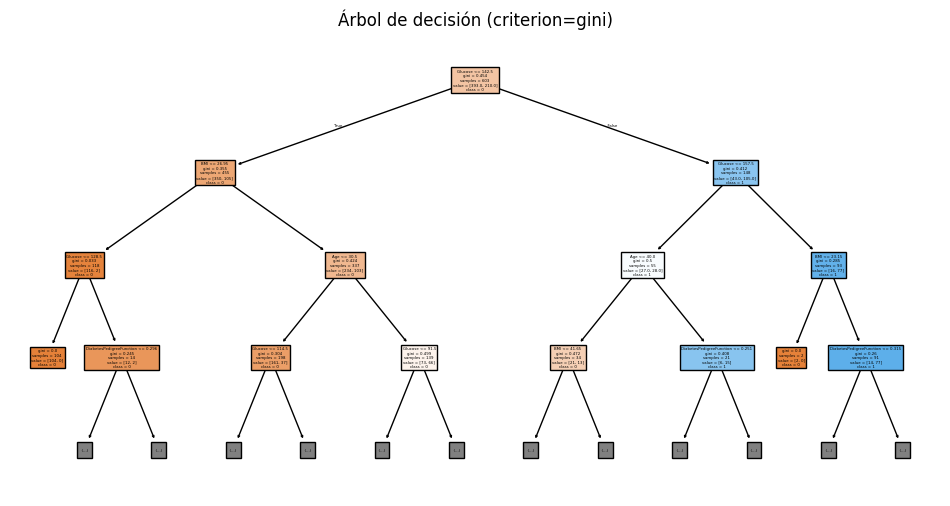


=== Resultados con criterion = entropy ===
[[77 22]
 [25 27]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        99
           1       0.55      0.52      0.53        52

    accuracy                           0.69       151
   macro avg       0.65      0.65      0.65       151
weighted avg       0.68      0.69      0.69       151



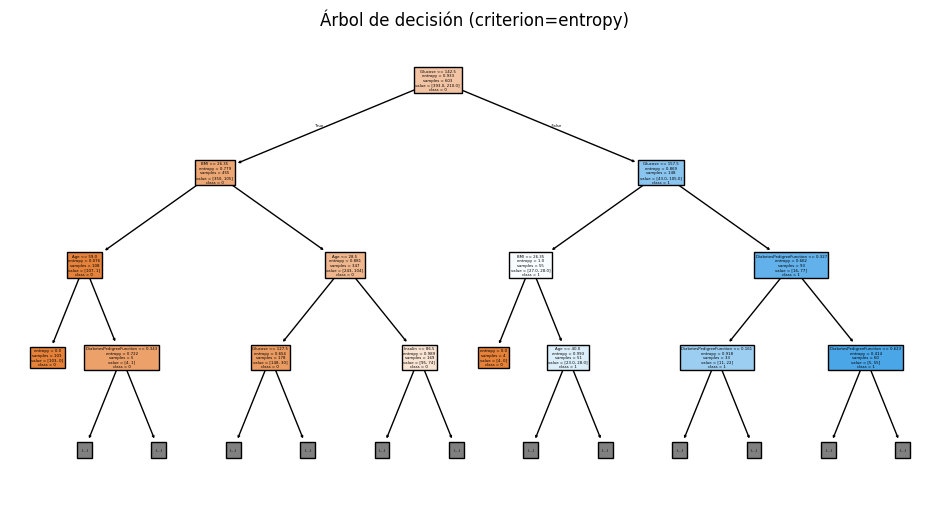


=== Resultados con criterion = log_loss ===
[[77 22]
 [25 27]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        99
           1       0.55      0.52      0.53        52

    accuracy                           0.69       151
   macro avg       0.65      0.65      0.65       151
weighted avg       0.68      0.69      0.69       151



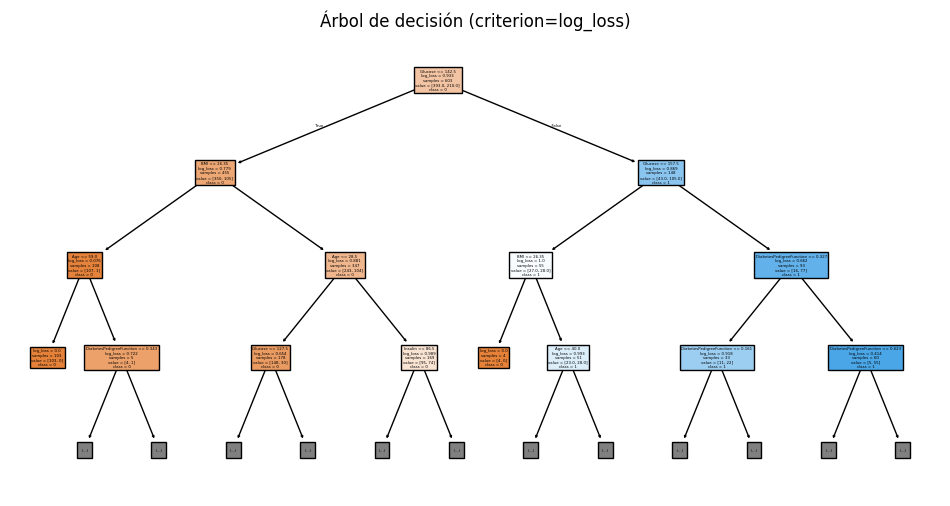


Exactitud por criterio:
gini: 0.6755
entropy: 0.6887
log_loss: 0.6887


In [23]:
criterios = ['gini', 'entropy', 'log_loss']

resultados = {}

for criterio in criterios:
    model = DecisionTreeClassifier(criterion=criterio, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"\n=== Resultados con criterion = {criterio} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Guardar score
    resultados[criterio] = model.score(X_test, y_test)
    
    # Graficar árbol (opcional, cuidado si es grande)
    plt.figure(figsize=(12, 6))
    plot_tree(model, feature_names=X.columns, class_names=['0','1'], filled=True, max_depth=3)
    plt.title(f'Árbol de decisión (criterion={criterio})')
    plt.show()

print("\nExactitud por criterio:")
for c, score in resultados.items():
    print(f"{c}: {score:.4f}")

Tenemos la exctitud de los criterios por debajo de 0.70 lo que es bastante pobre, vamos a optimizar parametros con GridSearch

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['entropy', 'log_loss'],  # los mejores
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid.best_params_)

print("Mejor score CV:", grid.best_score_)
print("Accuracy en test:", grid.best_estimator_.score(X_test, y_test))

best_model = grid.best_estimator_



Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor score CV: 0.7462121212121212
Accuracy en test: 0.7019867549668874


Los resultados obtenidos han mejorado sustancial el modelo con Validacion cruzada 74%   Y un accuracy de 70%

In [26]:


import os
import joblib

# Crear carpeta si no existe
os.makedirs('modelos', exist_ok=True)

# Guardar el modelo
joblib.dump(best_model, 'modelos/decision_tree_diabetes.pkl')


['modelos/decision_tree_diabetes.pkl']